In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transactions-fraud-datasets/mcc_codes.json
/kaggle/input/transactions-fraud-datasets/users_data.csv
/kaggle/input/transactions-fraud-datasets/transactions_data.csv
/kaggle/input/transactions-fraud-datasets/cards_data.csv
/kaggle/input/transactions-fraud-datasets/train_fraud_labels.json


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)

> # ***Data Overview*** 

In [3]:
df = pd.read_csv('/kaggle/input/transactions-fraud-datasets/users_data.csv')
df

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1


In [4]:
df.columns

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [6]:
df.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [7]:
df.tail()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1
1999,1110,21,60,1998,11,Female,472 Ocean View Street,42.86,-71.48,$32325,$65909,$181261,673,2


In [8]:
df.shape

(2000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [10]:
df.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,850.000000,9.000000


In [11]:
df.describe(include='O')

,gender,address,per_capita_income,yearly_income,total_debt
count,2000,2000,2000,2000,2000
unique,2,1999,1754,1948,1880
top,Female,506 Washington Lane,$0,$44128,$0
freq,1016,2,15,3,102


In [12]:
df.isna().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [19]:
df['per_capita_income'].unique()

per_capita_income
0        15
19382     4
13739     3
40364     3
21992     3
         ..
17537     1
17584     1
24331     1
15138     1
32325     1
Name: count, Length: 1754, dtype: int64

In [15]:
df['yearly_income'].unique()

array(['$59696', '$77254', '$33483', ..., '$30942', '$54654', '$65909'],
      dtype=object)

In [16]:
df['total_debt'].unique()

array(['$127613', '$191349', '$196', ..., '$71066', '$27241', '$181261'],
      dtype=object)

> # ***Cleans raw data by removing unwanted symbols***

In [4]:
cols = ['per_capita_income','yearly_income', 'total_debt']
for col in cols:
    df[col] = df[col].astype(str).str.replace('$','')
    df[col] = pd.to_numeric(df[col].str.replace('[^0-9]','',regex=True),errors='coerce').fillna(0)

In [18]:
df.dtypes

id                     int64
current_age            int64
retirement_age         int64
birth_year             int64
birth_month            int64
gender                object
address               object
latitude             float64
longitude            float64
per_capita_income      int64
yearly_income          int64
total_debt             int64
credit_score           int64
num_credit_cards       int64
dtype: object

In [22]:
df.nunique()

id                   2000
current_age            80
retirement_age         29
birth_year             80
birth_month            12
gender                  2
address              1999
latitude              989
longitude            1224
per_capita_income    1754
yearly_income        1948
total_debt           1880
credit_score          321
num_credit_cards        9
dtype: int64

<html lang="en">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width,initial-scale=1">
<style>
  :root {
    --bg:#CCD3CA; /* الخلفية */
    --text:#1f2937; /* لون النصوص داكن */
    --accent:#374151;
    font-family:'Segoe UI',Tahoma,Arial,sans-serif;
  }
  body {
    background:var(--bg);
    display:flex;
    justify-content:center;
    padding:20px;
  }
  .container {
    max-width:900px;
    background:var(--bg);
    padding:20px;
    border-radius:12px;
    box-shadow:0 6px 20px rgba(0,0,0,0.08);
    border:1px solid #999;
  }
  h2 {
    color:var(--text);
    font-size:20px;
    margin-bottom:12px;
  }
  p {
    color:var(--text);
    line-height:1.6;
    font-size:15px;
  }
  ul {
    padding-left:20px;
    margin-top:10px;
  }
  li {
    margin-bottom:8px;
    color:var(--accent);
  }
</style>
</head>
<body>
  <div class="container">
    <h2>Line Plot: Yearly Income by Current Age</h2>
    <p>This visualization shows how the <strong>average yearly income</strong> changes across different <strong>age groups</strong>, divided into five income bins: Very Low, Low, Medium, High, and Very High.</p>
    <ul>
      <li><strong>Higher Income for Younger Adults:</strong> Individuals aged <strong>20–40</strong> show a surprisingly higher average income .</li>
      <li><strong>Income Distribution:</strong> The stacked area highlights which income group dominates each age range.</li>
      <li><strong>Insight:</strong> Younger workers may have higher-paying tech or professional jobs, while older groups may have more variation.</li>
      <li><strong>Decision Making:</strong> This insight helps tailor products for high-income young professionals.</li>
    </ul>
  </div>
</body>
</html>


In [6]:
df['income_bin'] = pd.qcut(df['yearly_income'], q=5, labels=['Very Low','Low','Medium','High','Very High'])


pivot_df = df.pivot_table(index='current_age',columns='income_bin',values='yearly_income',aggfunc='mean')
pivot_df

income_bin,Very Low,Low,Medium,High,Very High
current_age,,,,,
18,28866.333333,33760.625000,41608.785714,50083.095238,81138.000000
19,28893.500000,32652.777778,41595.000000,51383.750000,84571.857143
20,28682.000000,35183.666667,40547.750000,49046.500000,64621.857143
21,26754.333333,34674.166667,41802.000000,49878.875000,91831.900000
22,21617.142857,34595.428571,41552.571429,50541.363636,80037.000000
...,...,...,...,...,...
93,10782.000000,NaN,NaN,NaN,NaN
94,NaN,NaN,40787.000000,NaN,60080.000000
98,NaN,33869.000000,42306.000000,NaN,NaN


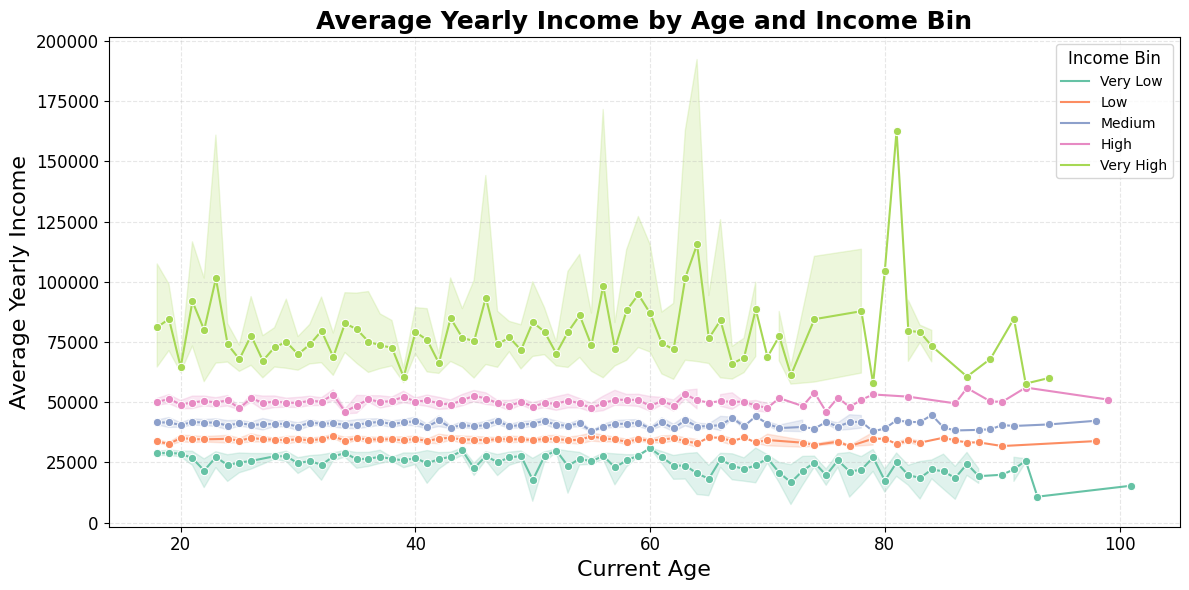

In [15]:
plt.figure(figsize=(12,6))

sns.lineplot(
    x='current_age',
    y='yearly_income',
    hue='income_bin', 
    data=df,
    palette='Set2',    
    marker='o'
)

plt.title("Average Yearly Income by Age and Income Bin", fontsize=18, fontweight='bold')
plt.xlabel("Current Age", fontsize=16)
plt.ylabel("Average Yearly Income", fontsize=16)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Income Bin", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

<html lang="en">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width,initial-scale=1">
<style>
  :root{
    --bg:#CCD3CA;
    --card:#f5f5f5;
    --accent:#2d3748;
    --muted:#4a5568;
    --border:#d1d5db;
    font-family: 'Segoe UI', Tahoma, Arial, sans-serif;
  }

  body{
    background:var(--bg);
    margin:0;
    display:flex;
    justify-content:center;
    align-items:center;
    padding:20px;
  }
  .card{
    background:var(--card);
    border-radius:12px;
    box-shadow:0 6px 20px rgba(0,0,0,0.08);
    border:1px solid var(--border);
    padding:20px;
    max-width:700px;
    width:100%;
    color:var(--accent);
  }
  h2{
    margin:0 0 10px 0;
    font-size:20px;
    font-weight:bold;
  }
  p{
    margin:0 0 12px 0;
    font-size:15px;
    line-height:1.6;
  }
  .highlight{
    background:#ffe4c4;
    padding:6px 10px;
    border-radius:6px;
    display:inline-block;
    margin:6px 0;
    font-weight:bold;
  }
</style>
</head>
<body>
  <div class="card">
    <h2>Insight: High-Income Users Hold the Largest Debt</h2>
    <p>When we plotted <strong>Total Debt</strong> across <strong>Income Bins</strong> using a boxplot, we noticed that:</p>

<div class="highlight"> Very High Income group shows the highest debt values compared to all other bins.</div>

<p>This does not necessarily indicate financial stress — high-income individuals usually have:</p>
    <ul>
      <li>Greater access to credit facilities (higher credit limits).</li>
      <li>Larger purchases like real estate or business investments funded by loans.</li>
      <li>Lower risk of default as a percentage of their income.</li>
    </ul>

<p style="font-size:14px;color:var(--muted)">Recommendation: Compare <strong>Debt-to-Income Ratio</strong> rather than absolute debt values to understand true financial burden.</p>
  </div>
</body>
</html>


In [7]:
df['debt_to_income'] = df['total_debt'] / df['yearly_income']
df.groupby('income_bin')['debt_to_income'].mean()

income_bin
Very Low     1.171075
Low          1.439113
Medium       1.453624
High         1.480311
Very High    1.364343
Name: debt_to_income, dtype: float64

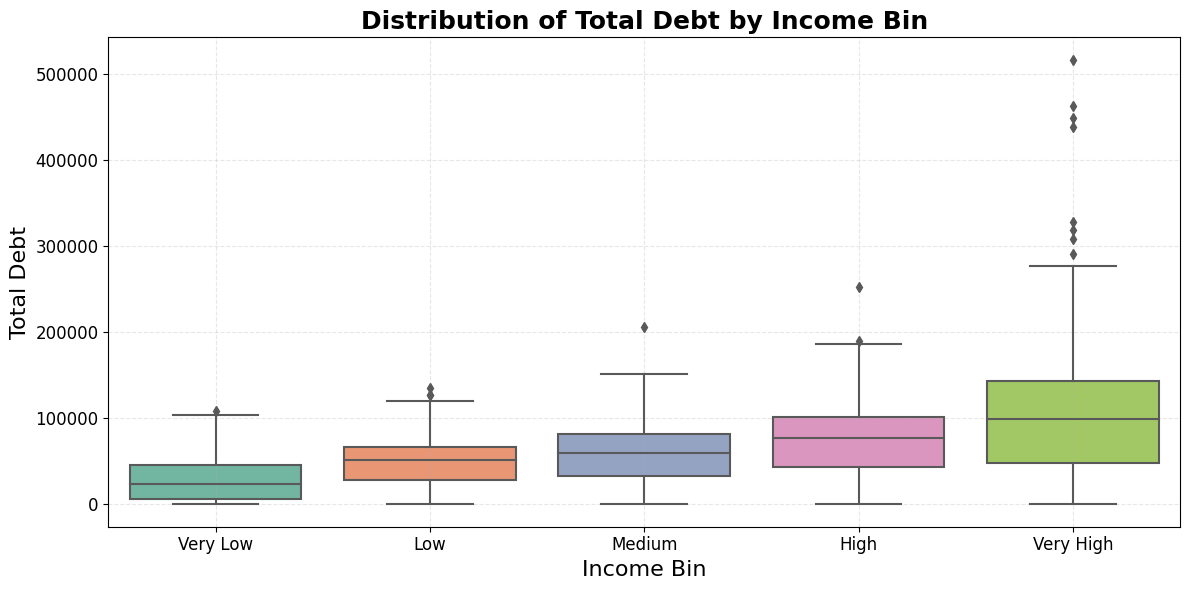

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x='income_bin',
    y='total_debt',
    data=df,
    palette='Set2'
)

plt.title("Distribution of Total Debt by Income Bin", fontsize=18, fontweight='bold')
plt.xlabel("Income Bin", fontsize=16)
plt.ylabel("Total Debt", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

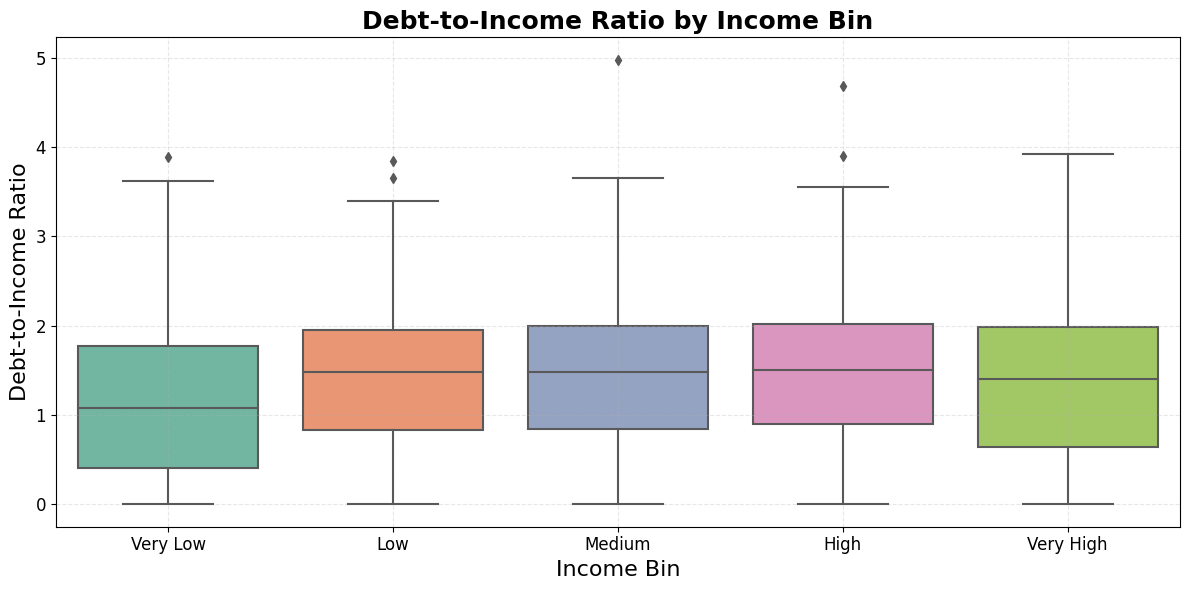

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x='income_bin',
    y='debt_to_income',
    data=df,
    palette='Set2'
)

plt.title("Debt-to-Income Ratio by Income Bin", fontsize=18, fontweight='bold')
plt.xlabel("Income Bin", fontsize=16)
plt.ylabel("Debt-to-Income Ratio", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

<html lang="en">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width,initial-scale=1">
<style>
  :root {
    --bg:#CCD3CA;
    --card:#E5E6E4;
    --accent:#3b0764;
    --text:#1f2937;
    font-family: 'Segoe UI', Tahoma, Arial, sans-serif;
  }

  .insight-container {
    background: var(--bg);
    padding: 18px;
    display: flex;
    justify-content: center;
  }

  .insight-card {
    max-width: 900px;
    background: var(--card);
    border-radius: 12px;
    box-shadow: 0 6px 18px rgba(15,23,42,0.08);
    padding: 20px;
    box-sizing: border-box;
    border: 1px solid #d1d5db;
  }

  .insight-card h2 {
    margin: 0 0 8px 0;
    color: var(--accent);
    font-size: 18px;
  }

  .insight-card p {
    color: var(--text);
    line-height: 1.6;
    margin: 0 0 10px 0;
    font-size: 15px;
  }

  .key-points {
    margin-top: 10px;
    display: grid;
    gap: 8px;
  }

  .point {
    background: #D6DAC8;
    padding: 10px;
    border-radius: 8px;
    border-left: 4px solid var(--accent);
    color: var(--text);
    font-size: 14px;
  }
</style>
</head>
<body>
  <div class="insight-container">
    <div class="insight-card">
      <h2>Total Debt vs Current Age by Income Bin</h2>
      <p>The FacetGrid shows how <strong>Total Debt</strong> changes with <strong>Current Age</strong> for each income group (bin). By splitting the data by <em>income_bin</em>, we can clearly see different trends for low, medium, and high-income individuals.</p>
      
<div class="key-points">
        <div class="point"><strong>1. Clear Separation:</strong> Each income bin is displayed in its own subplot, reducing overlapping lines and making age-related trends easier to spot.</div>
        <div class="point"><strong>2. Debt Peaks:</strong> You can identify which age ranges have the highest debt within each income level.</div>
        <div class="point"><strong>3. Insights:</strong> Lower-income bins may show earlier peaks in debt, while high-income bins might have steady or rising debt across older ages.</div>
      </div>
      
<p style="margin-top:10px;font-size:13px;color:var(--text)">Tip: Compare shapes across bins — parallel trends can indicate similar financial behavior across income levels, while diverging shapes may reveal distinct patterns.</p>
    </div>
  </div>
</body>
</html>


<Figure size 1200x800 with 0 Axes>

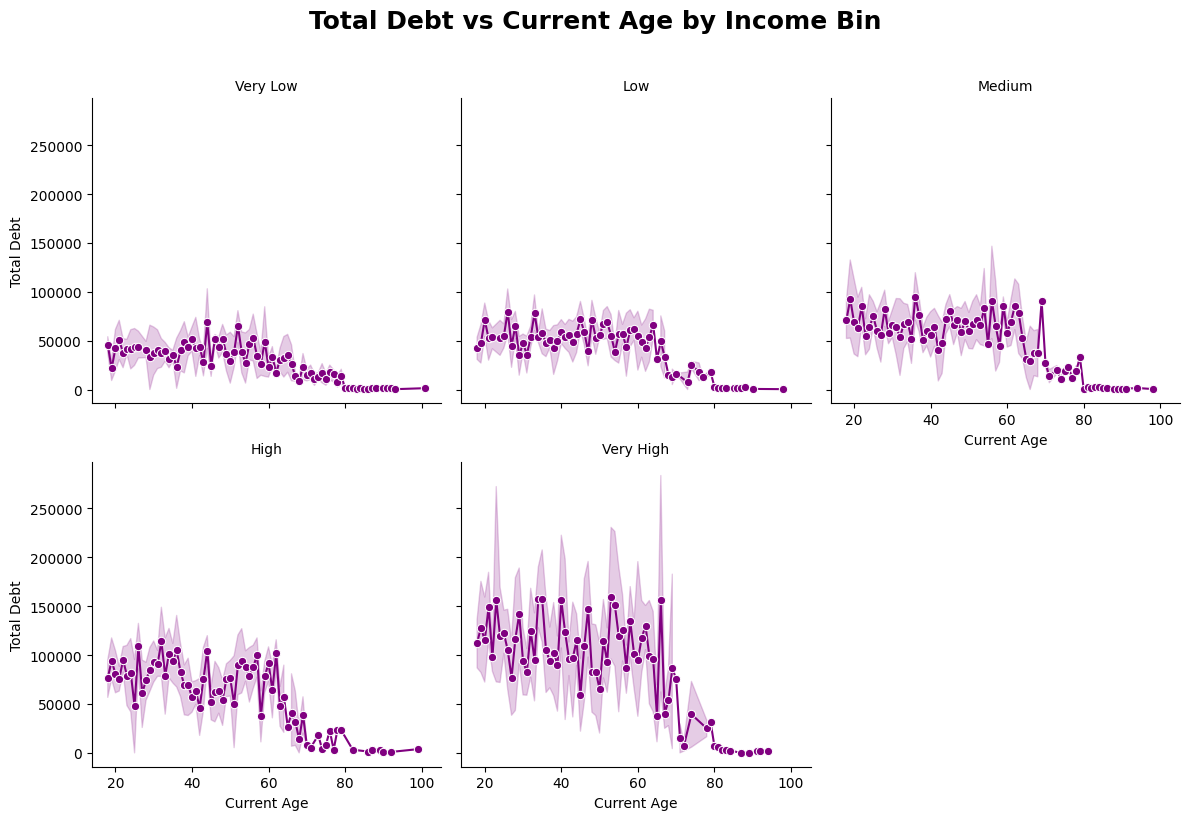

In [26]:
plt.figure(figsize=(12,8))
g = sns.FacetGrid(df, col='income_bin', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x='current_age', y='total_debt', marker='o', color='purple')
g.set_axis_labels("Current Age", "Total Debt")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Total Debt vs Current Age by Income Bin", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [15]:
fig = px.scatter_geo(df, lat='latitude' , lon='longitude', color="income_bin", size="total_debt", title="Geographical Distribution of Countries")
iplot(fig)

In [17]:
df['credit_score'].unique()

array([787, 701, 698, 722, 675, 704, 672, 728, 755, 810, 761, 629, 776,
       712, 599, 723, 719, 660, 683, 661, 819, 700, 714, 610, 627, 766,
       739, 850, 783, 751, 637, 765, 737, 793, 662, 666, 822, 741, 706,
       685, 842, 770, 568, 788, 771, 829, 784, 797, 634, 693, 631, 763,
       696, 717, 795, 786, 760, 674, 697, 688, 820, 566, 612, 743, 823,
       744, 747, 677, 691, 740, 727, 748, 655, 729, 687, 600, 680, 749,
       735, 664, 716, 641, 615, 840, 738, 676, 702, 821, 681, 632, 775,
       742, 777, 773, 619, 639, 707, 772, 684, 746, 694, 721, 645, 618,
       594, 732, 621, 690, 689, 789, 646, 808, 781, 726, 635, 488, 762,
       686, 725, 699, 626, 750, 736, 782, 752, 731, 720, 710, 601, 622,
       705, 679, 609, 633, 805, 643, 692, 578, 838, 809, 503, 703, 669,
       718, 711, 659, 791, 695, 562, 759, 602, 767, 839, 569, 778, 800,
       665, 592, 754, 588, 583, 798, 790, 630, 803, 590, 713, 557, 792,
       624, 652, 734, 816, 513, 584, 638, 603, 745, 769, 598, 72

<html lang="en">
<head>
<style>
  :root{
    --bg:#CCD3CA;
    --accent:#1a1a1a;
    --muted:#333333;
    font-family: 'Segoe UI', Tahoma, Arial, sans-serif;
  }
  .insight-box{
    background:var(--bg);
    border-radius:12px;
    padding:18px;
    max-width:900px;
    margin:auto;
    border:1px solid #bbb;
    box-shadow:0 4px 14px rgba(0,0,0,0.1);
  }
  .insight-box h2{
    color:var(--accent);
    font-size:20px;
    margin:0 0 10px 0;
  }
  .insight-box p{
    color:var(--muted);
    font-size:15px;
    line-height:1.6;
    margin-bottom:8px;
  }
  .insight-points{
    margin-top:8px;
    padding-left:18px;
  }
  .insight-points li{
    margin-bottom:6px;
  }
</style>
</head>
<body>
  <div class="insight-box">
    <h2>Insights: Total Debt vs Credit Score</h2>
    <p>This scatter plot compares <strong>Total Debt</strong> against <strong>Credit Score</strong> while highlighting income levels:</p>
    <ul class="insight-points">
      <li><strong>Color:</strong> Represents <em>income bin</em> (Very Low → Very High).</li>
      <li><strong>Bubble size:</strong> Scales with yearly income, allowing you to spot high earners easily.</li>
      <li><strong>Trend:</strong> Higher debt often corresponds to slightly lower credit scores, but high-income individuals maintain better scores.</li>
      <li><strong>Clustering:</strong> Most points cluster around moderate debt with average credit scores, with few outliers at extreme debt values.</li>
    </ul>
    <p><strong>Key Takeaway:</strong> The relationship shows that income levels influence how much debt a person can hold while keeping a good credit score.</p>
  </div>
</


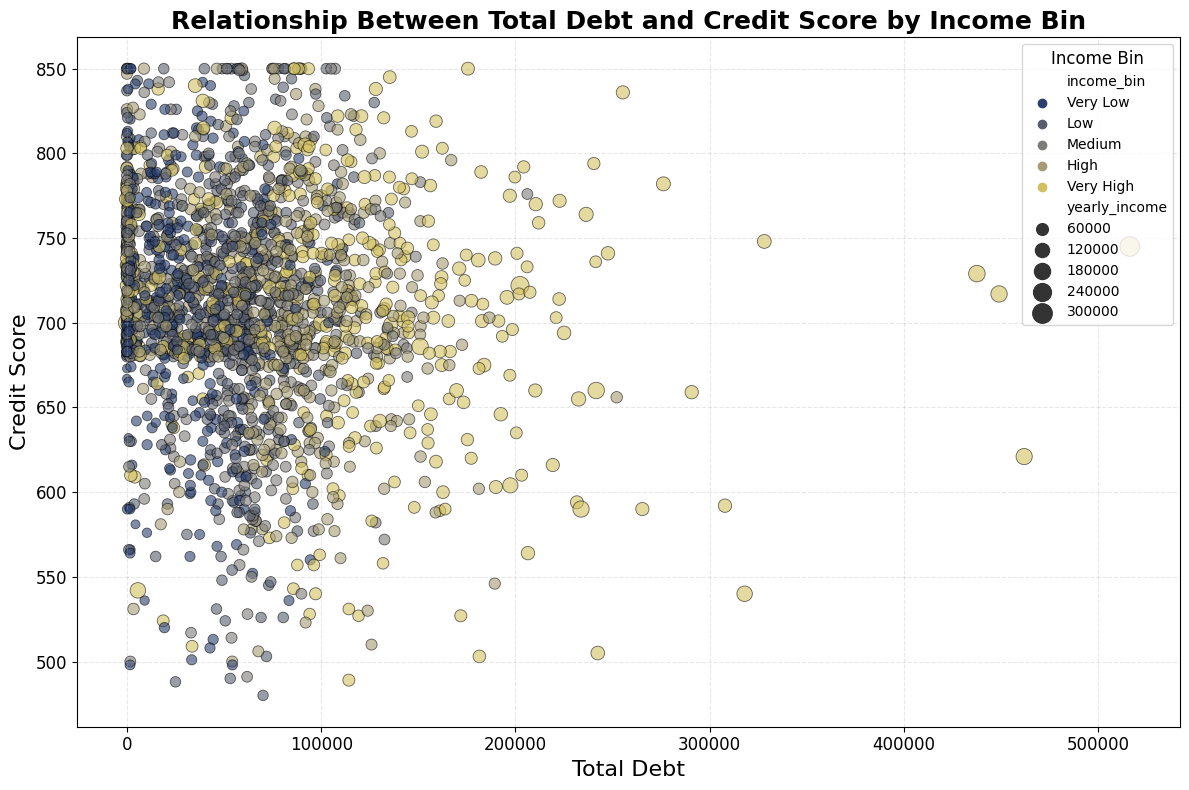

In [22]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=df,
    x='total_debt',
    y='credit_score',
    hue='income_bin',
    palette='cividis',
    size='yearly_income',       
    sizes=(40, 200),             
    alpha=0.6,                   
    edgecolor='black'            
)
plt.title("Relationship Between Total Debt and Credit Score by Income Bin", fontsize=18, fontweight='bold')
plt.xlabel("Total Debt", fontsize=16)
plt.ylabel("Credit Score", fontsize=16)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Income Bin", title_fontsize=12, fontsize=10, loc='best')
plt.tight_layout()
plt.show()

In [24]:
# years_to_retirement = retirement_age - current_age
df['years_to_retirement'] = df['retirement_age'] - df['current_age']
df['years_to_retirement']

0       13
1       15
2      -14
3        0
4       27
        ..
1995    38
1996     3
1997    20
1998    -6
1999    39
Name: years_to_retirement, Length: 2000, dtype: int64

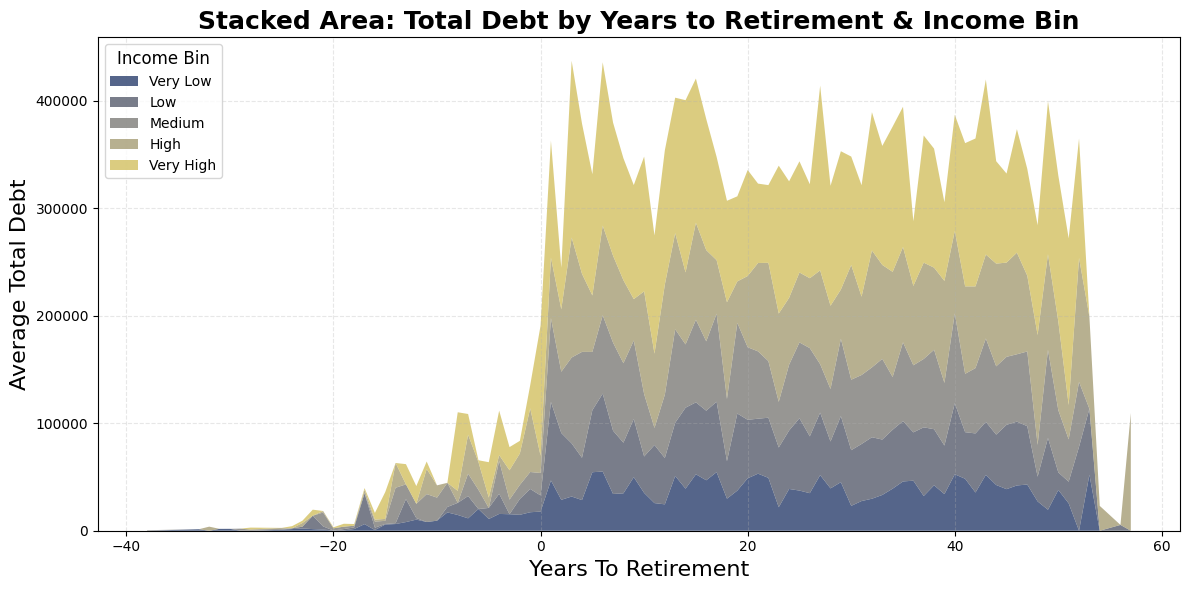

In [31]:
pivot_df = df.groupby(['years_to_retirement', 'income_bin'])['total_debt'].mean().reset_index()
pivot_df = pivot_df.pivot(index='years_to_retirement', columns='income_bin', values='total_debt').fillna(0)

# Plot stacked area
plt.figure(figsize=(12,6))
colors = sns.color_palette("cividis", n_colors=len(pivot_df.columns))
plt.stackplot(
    pivot_df.index,
    [pivot_df[col] for col in pivot_df.columns],
    labels=pivot_df.columns,
    alpha=0.8,
    colors = colors
)

plt.title("Stacked Area: Total Debt by Years to Retirement & Income Bin", fontsize=18, fontweight='bold')
plt.xlabel("Years To Retirement", fontsize=16)
plt.ylabel("Average Total Debt", fontsize=16)
plt.legend(title="Income Bin", fontsize=10, title_fontsize=12, loc="upper left")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [32]:
# avg_debt_per_card = total_debt / num_credit_cards

df['avg_debt_per_card'] = df['total_debt'] / df['num_credit_cards']
df['avg_debt_per_card']

0        25522.600000
1        38269.800000
2           39.200000
3        50582.000000
4       183855.000000
            ...      
1995     29279.000000
1996     26120.000000
1997     23688.666667
1998     27241.000000
1999     90630.500000
Name: avg_debt_per_card, Length: 2000, dtype: float64

<div style="background:#CCD3CA;padding:18px;border-radius:12px;max-width:920px;margin:12px auto;font-family:Segoe UI, Tahoma, Arial, sans-serif;border:1px solid #999;box-shadow:0 6px 20px rgba(0,0,0,0.08);color:#111827;">
  <h2 style="margin:0 0 10px 0;color:#0f172a;font-size:20px;">Scatter / Bubble Plot: Credit Cards vs. Avg Debt per Card</h2>

  <p style="margin:8px 0 12px 0;line-height:1.5;font-size:15px;color:#1f2937;">
    This plot visualizes the relationship between the <strong>number of credit cards</strong> a customer holds and their <strong>average debt per card</strong>.
    Each point is colored by <em>income_bin</em> and sized by the customer's <strong>total debt</strong>.
  </p>

  <ul style="margin:8px 0 12px 18px;color:#1f2937;font-size:14px;line-height:1.5;">
    <li><strong>X-axis:</strong> <code>num_credit_cards</code> — number of credit cards held.</li>
    <li><strong>Y-axis:</strong> <code>avg_debt_per_card</code> — total_debt divided by num_credit_cards (average burden per card).</li>
    <li><strong>Color (hue):</strong> <code>income_bin</code> — shows income group (Very Low → Very High).</li>
    <li><strong>Bubble size:</strong> <code>total_debt</code> — larger bubbles mean higher absolute debt.</li>
  </ul>

  <div style="background:#E6E9E4;padding:10px;border-radius:8px;border-left:4px solid #0f172a;margin-bottom:10px;">
    <strong style="display:block;margin-bottom:6px;">How to read the plot</strong>
    <ol style="margin:0 0 0 18px;padding:0;color:#0f172a;">
      <li>If large bubbles sit high on the Y-axis → customers carry a high average debt per card and large total exposure.</li>
      <li>If avg_debt_per_card decreases as num_credit_cards increases → debt may be spread across more cards (lower per-card burden).</li>
      <li>Compare colors: if <em>Very High</em> income bubbles are large but located lower on Y → high earners carry large total debt but manageable per-card burden.</li>
      <li>Clusters suggest typical profiles (e.g., many small cards with low avg debt vs few cards with high avg debt).</li>
    </ol>
  </div>

  <p style="margin:0 0 8px 0;color:#1f2937;font-size:14px;">
    <strong>Key takeaways to look for:</strong>
  </p>
  <ul style="margin:6px 0 0 18px;color:#1f2937;font-size:14px;line-height:1.5;">
    <li>Which income bins contain the largest bubbles? (Who holds the most absolute debt?)</li>
    <li>Do higher-income groups show lower <em>avg_debt_per_card</em> despite larger total debt? — this indicates healthier leverage.</li>
    <li>Are there outliers with very high avg debt per card and few cards? These may be high-risk cases worth reviewing.</li>
  </ul>

  <p style="margin-top:12px;font-size:13px;color:#374151;">
    <strong>Suggested follow-ups:</strong> hover or label the largest bubbles to inspect <code>id, credit_score, card_brand</code>; compute and show <code>debt_to_income</code> next to each point for deeper risk assessment.
  </p>
</div>

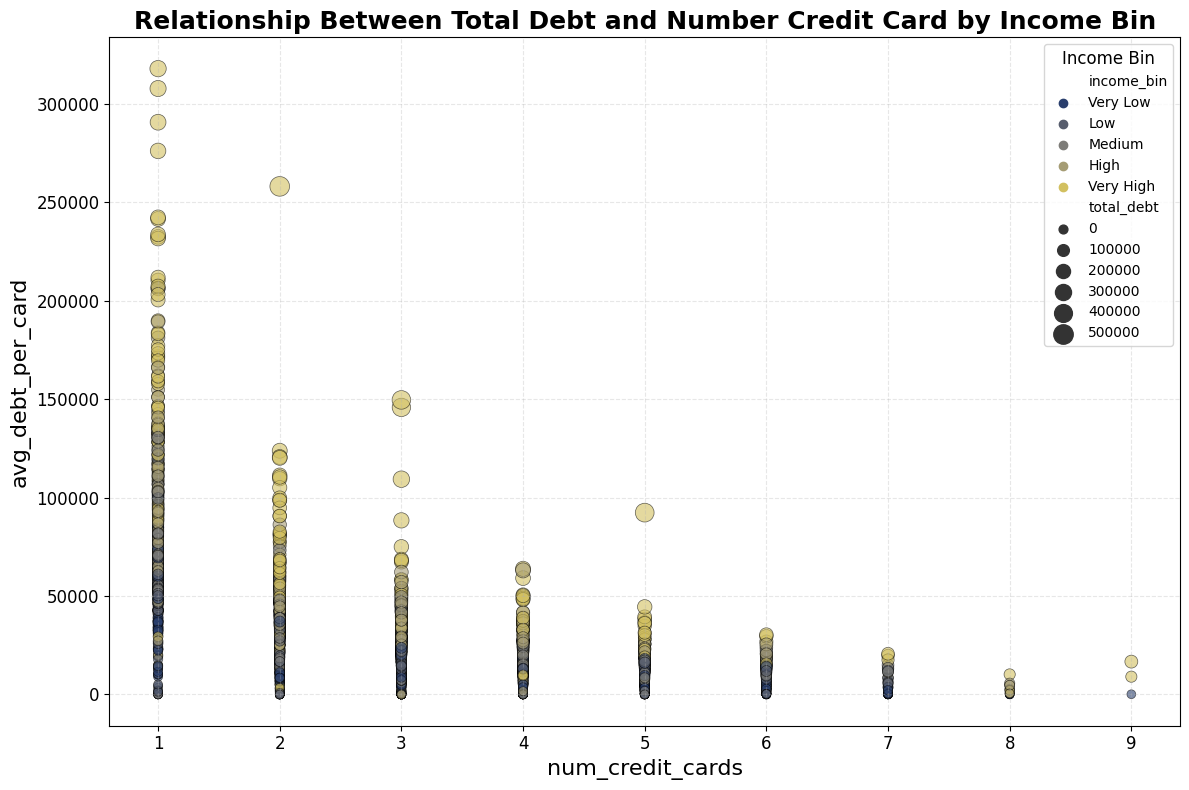

In [34]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=df,
    x='num_credit_cards',
    y='avg_debt_per_card',
    hue='income_bin',
    palette='cividis',
    size='total_debt',       
    sizes=(40, 200),             
    alpha=0.6,                   
    edgecolor='black'            
)
plt.title("Relationship Between Total Debt and Number Credit Card by Income Bin", fontsize=18, fontweight='bold')
plt.xlabel("num_credit_cards", fontsize=16)
plt.ylabel("avg_debt_per_card", fontsize=16)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Income Bin", title_fontsize=12, fontsize=10, loc='best')
plt.tight_layout()
plt.show()

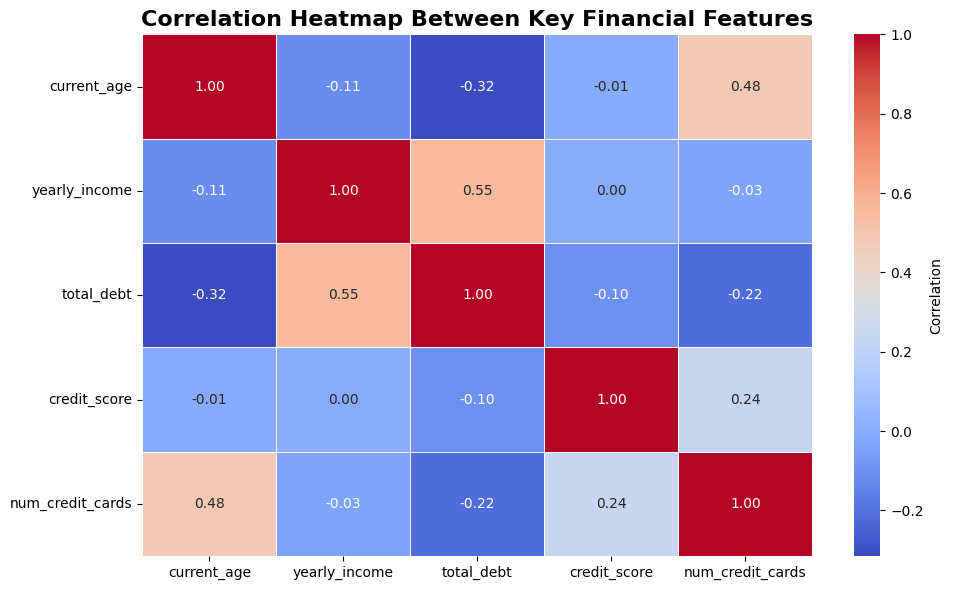

In [35]:
numeric_cols = df[['current_age', 'yearly_income', 'total_debt', 
                   'credit_score', 'num_credit_cards']]


corr = numeric_cols.corr()

# رسم heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True,       
    cmap='coolwarm',   
    fmt=".2f",         
    linewidths=0.5,    
    cbar_kws={'label': 'Correlation'}  
)
plt.title("Correlation Heatmap Between Key Financial Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [36]:
df['credit_score'] = pd.qcut(df['credit_score'], q=4, labels=['Poor', 'Fair', 'Good', 'Excellent'])
df['credit_score'].unique()

['Excellent', 'Fair', 'Good', 'Poor']
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

In [37]:
df.to_csv('User_cleaned.csv',index=False)